In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [21]:
iris = datasets.load_iris()

In [22]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [23]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [24]:
# 只取前两维特征
X = iris.data[:, :2]
Y = iris.target

In [25]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, Y) for clf in models)

In [26]:
#绘制图像
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


In [27]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
print(xx)
print(yy)

[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]]
[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.34 5.34 5.34 ... 5.34 5.34 5.34]
 [5.36 5.36 5.36 ... 5.36 5.36 5.36]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]]


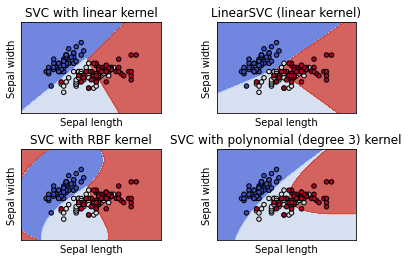

In [28]:
# 设置2*2的图
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [29]:
# 随机划分训练集和测试集
num = X.shape[0] # 样本总数
ratio = 7/3 # 训练集:测试集
num_test = int(num/(1+ratio)) # 测试集数目
num_train = num -  num_test # 训练集数目
index = np.arange(num) # 产生样本标号
np.random.shuffle(index) # 洗牌
x_test = X[index[:num_test],:] # 取出洗牌后前 num_test 作为测试集
y_test = Y[index[:num_test]]
x_train = X[index[num_test:],:]
y_train = Y[index[num_test:]]

In [30]:
# 构造线性分类器
linear1 = svm.SVC(decision_function_shape="ovo", kernel="linear",C=1)
linear1.fit(x_train, y_train)

linear2 = svm.SVC(decision_function_shape="ovo", kernel="linear",C=10)
linear2.fit(x_train, y_train)

linear3 = svm.SVC(decision_function_shape="ovo", kernel="linear",C=100)
linear3.fit(x_train, y_train)

y_test_pre_linear_1 = linear1.predict(x_test)
y_test_pre_linear_2 = linear2.predict(x_test)
y_test_pre_linear_3 = linear3.predict(x_test)

# 计算分类准确率
acc_linear1 = sum(y_test_pre_linear_1==y_test)/num_test
print('linear kernel1: The accuracy is', acc_linear1) 

acc_linear2 = sum(y_test_pre_linear_2==y_test)/num_test
print('linear kernel2: The accuracy is', acc_linear2) 

acc_linear3 = sum(y_test_pre_linear_3==y_test)/num_test
print('linear kernel3: The accuracy is', acc_linear3) 

linear kernel1: The accuracy is 0.7555555555555555
linear kernel2: The accuracy is 0.7777777777777778
linear kernel3: The accuracy is 0.7555555555555555


In [31]:
# 核函数选择'rbf'
rbf1 = svm.SVC(decision_function_shape="ovo", kernel="rbf",C=1)
rbf1.fit(x_train, y_train)

rbf2 = svm.SVC(decision_function_shape="ovo", kernel="rbf",C=10)
rbf2.fit(x_train, y_train)

rbf3 = svm.SVC(decision_function_shape="ovo", kernel="rbf",C=100)
rbf3.fit(x_train, y_train)

y_test_pre_rbf_1 = rbf1.predict(x_test)
y_test_pre_rbf_2 = rbf2.predict(x_test)
y_test_pre_rbf_3 = rbf3.predict(x_test)

# 计算分类准确率
acc_rbf1 = sum(y_test_pre_rbf_1==y_test)/num_test
print('rbf kernel1: The accuracy is', acc_rbf1) 

acc_rbf2 = sum(y_test_pre_rbf_2==y_test)/num_test
print('rbf kernel2: The accuracy is', acc_rbf2) 

acc_rbf3 = sum(y_test_pre_rbf_3==y_test)/num_test
print('rbf kernel3: The accuracy is', acc_rbf3) 

rbf kernel1: The accuracy is 0.7555555555555555
rbf kernel2: The accuracy is 0.7777777777777778
rbf kernel3: The accuracy is 0.8


In [32]:
# 核函数选择'poly'
poly1 = svm.SVC(decision_function_shape="ovo", kernel="poly",C=1)
poly1.fit(x_train, y_train)

poly2 = svm.SVC(decision_function_shape="ovo", kernel="poly",C=10)
poly2.fit(x_train, y_train)

poly3 = svm.SVC(decision_function_shape="ovo", kernel="poly",C=100)
poly3.fit(x_train, y_train)

y_test_pre_poly_1 = poly1.predict(x_test)
y_test_pre_poly_2 = poly2.predict(x_test)
y_test_pre_poly_3 = poly3.predict(x_test)

# 计算分类准确率
acc_poly1 = sum(y_test_pre_poly_1==y_test)/num_test
print('poly kernel1: The accuracy is', acc_poly1) 

acc_poly2 = sum(y_test_pre_poly_2==y_test)/num_test
print('poly kernel2: The accuracy is', acc_poly2) 

acc_poly3 = sum(y_test_pre_poly_3==y_test)/num_test
print('poly kernel3: The accuracy is', acc_poly3) 

poly kernel1: The accuracy is 0.7555555555555555
poly kernel2: The accuracy is 0.7333333333333333
poly kernel3: The accuracy is 0.7333333333333333
